<h2>Packages and Reading Data</h2>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import metrics
import warnings
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale,normalize, StandardScaler
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("max_rows",1000)
pd.set_option("max_columns",100)

<h2>About Data</h2>

The data indicates sale and profit of the 60 Customers.
</br>

Customer ID  : Unique ID of the Customer

Industry Code: Unique identifier for industry

Gross Sales  : Total Sale of the customer

Gross Profit : Total Profit Made on sale

Percent Gross Profit : Profit/Sales

Competitive Rating* : Ranking for each customer in a industry with Least=1(Least Competitive) and Highest =5 (Most Competitive)

In [4]:
sale_data_df = pd.read_excel(os.getcwd()+"\Sales_Data.xlsx")

In [5]:
sale_data_df.head()

,Customer,Percent Gross Profit,Gross Sales,Gross Profit,Industry Code,Competitive Rating*
0,4,0.22,249,54.78,5,1
1,5,0.21,476,99.96,5,1
2,44,0.37,31019,11477.03,6,1
3,19,0.60,3864,2318.40,7,1
4,24,0.32,4711,1507.52,7,1


In [7]:
sale_data_df.columns=['customer','percent_gross_profit','gross_sales','gross_profit','industry_code','competitive_rating']
#columns renamed

<h2>Data stats</h2>

In [8]:
sale_data_df.describe()

,customer,percent_gross_profit,gross_sales,gross_profit,industry_code,competitive_rating
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,0.211925,25016.500000,4239.164583,4.483333,3.000000
std,17.464249,0.114014,36344.568583,5811.729263,1.899970,1.089239
min,1.000000,0.030000,170.000000,40.600000,1.000000,1.000000
25%,15.750000,0.140000,2645.750000,435.060000,3.000000,2.000000
50%,30.500000,0.200000,6760.000000,1662.430000,5.000000,3.000000
75%,45.250000,0.245000,32171.000000,5690.385000,6.000000,4.000000
max,60.000000,0.600000,179101.000000,25379.340000,7.000000,5.000000


<h2>Lets Get some insights !!!</h2>

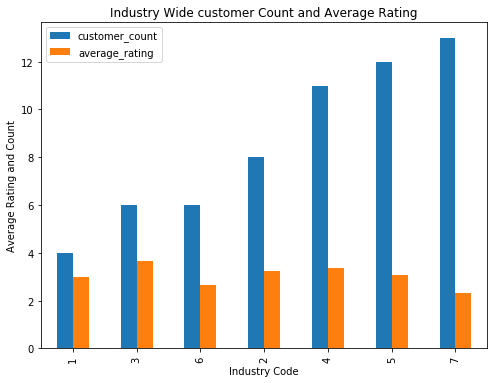

In [44]:
sale_data_df.groupby(['industry_code']).agg(customer_count=('customer','count'),\
                                            average_rating=('competitive_rating','mean')).sort_values('customer_count').reset_index().\
                                            plot(x='industry_code',y=['customer_count','average_rating'],figsize=(8,6),kind='bar')
plt.title("Industry Wide customer Count and Average Rating")
plt.xlabel("Industry Code")
plt.ylabel("Average Rating and Count")
plt.show()

<b>Analysis</b>

Industry 7 has highest number of customers followed by 5 and 4

Industry 1 has lowest number of customers

On Average 4 customers are in each Industry group

On Average the rating in Each Industry group is approximately 3 except Industry 7 which has average Rating of ~2(Might be because of high customers in this group, the average is diluted)

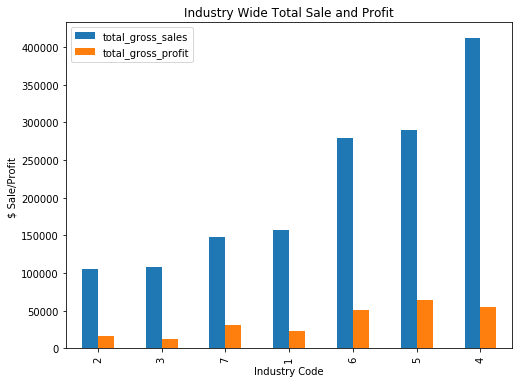

In [46]:
sale_data_df.groupby(['industry_code']).agg(total_gross_sales=('gross_sales','sum'),\
                                            total_gross_profit=('gross_profit','sum')).sort_values('total_gross_sales').reset_index().\
                                            plot(x='industry_code',y=['total_gross_sales','total_gross_profit'],figsize=(8,6),kind='bar')
plt.title("Industry Wide Total Sale and Profit")
plt.xlabel("Industry Code")
plt.ylabel("$ Sale/Profit ")
plt.show()

<b>Analysis</b>

Industry 4 has highest sales followed by 5 and 6

But Industry 5 is earning high profits than 4 eventhough sale is high in industry 4

Industry 7 which has highest customer base is unfortunately cannot generate more sale or revenue

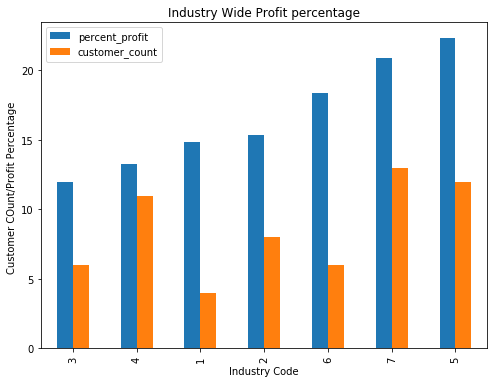

In [50]:
sale_data_df.groupby(['industry_code']).agg(total_gross_sales=('gross_sales','sum'),\
                                            total_gross_profit=('gross_profit','sum'),
                                           customer_count=('customer','count')).\
assign(percent_profit = lambda df: (df['total_gross_profit']/df['total_gross_sales'])*100).sort_values('percent_profit').reset_index().\
                                            plot(x='industry_code',y=['percent_profit','customer_count'],figsize=(8,6),kind='bar')
plt.title("Industry Wide Profit percentage")
plt.xlabel("Industry Code")
plt.ylabel("Customer COunt/Profit Percentage ")
plt.show()

<b>Analysis</b>

Industry 5 has highest profit percentage followed by 7 and 6

Eventhough industry 5 and Industry 4 have equal number of customers , industry has highest profit percentage

<h2>Don't wait lets cluster!!!</h2>

In [54]:
#Lets remove the customer id and Percent Gross Profit and apply the clustering
X=sale_data_df.loc[:, ~sale_data_df.columns.isin(['customer','percent_gross_profit',])]

In [81]:
#Training k means cluster
clustering = KMeans(n_clusters=4, random_state=0)
clustering.fit(X)

KMeans(n_clusters=4, random_state=0)

In [82]:
sale_data_df['cluster_id'] = clustering.labels_

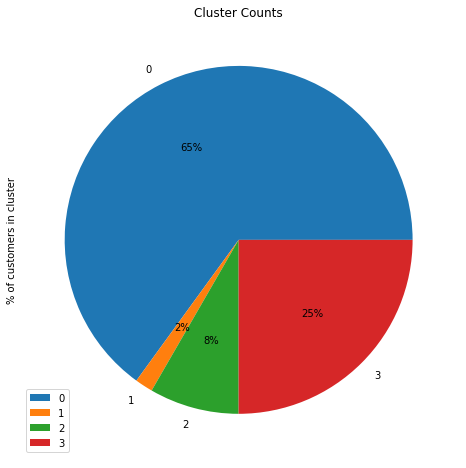

In [84]:
#Number of customers per cluster
sale_data_df.groupby(['cluster_id']).agg(cluster_count = ('customer','count')).plot.pie(y='cluster_count', figsize=(8, 8),autopct='%1.0f%%')
plt.title("Cluster Counts")
plt.ylabel("% of customers in cluster")
plt.show()

<b>Analysis</b>

Almost 65% of the data is been assigned to cluster 0, 25% to cluster 3 and 10% to cluster 1 and 2

<h3>65% of data to one cluster is wow factor, lets see whats the best cluster number to suggest</h3>

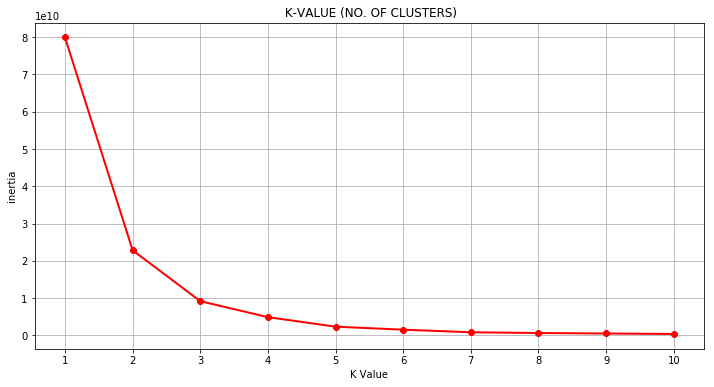

In [73]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))  
plt.title(" K-VALUE (NO. OF CLUSTERS)")
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("inertia")
plt.show()

From the graph we can see that 5 or 6 clusters can be an optimal number 

In [85]:
#After cluster formation
sale_data_df.sort_values('cluster_id')

,customer,percent_gross_profit,gross_sales,gross_profit,industry_code,competitive_rating,cluster_id
0,4,0.2200,249,54.780,5,1,0
26,37,0.2800,16343,4576.040,3,3,0
31,18,0.3700,3272,1210.640,5,3,0
32,22,0.5000,4190,2095.000,5,3,0
33,38,0.2700,19985,5395.950,5,3,0
35,20,0.2400,3988,957.120,6,3,0
36,25,0.1500,4824,723.600,6,3,0
38,10,0.1655,1110,183.705,7,3,0
39,11,0.2000,1153,230.600,7,3,0
40,14,0.2000,2307,461.400,7,3,0


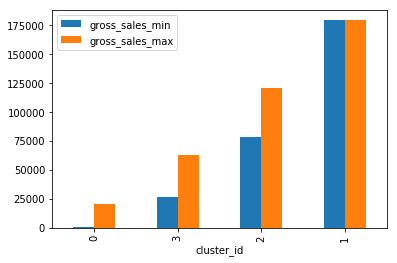

In [89]:
sale_data_df.groupby(['cluster_id']).agg(gross_sales_min=('gross_sales','min'),
                                        gross_sales_max= ('gross_sales','max')).reset_index().sort_values('gross_sales_min').plot(kind='bar',x='cluster_id',y=['gross_sales_min','gross_sales_max'])

<b>Analysis</b>

It is clearly evident that Cluster are been created on gross_sales

If gross_sales<=20160 then cluster 0

if gross_sales>20160 and gross_sales<=62862 then cluster 3

if gross_sales>62862 and gross_sales<=78574 then cluster 2

if gross_sales>78574 then cluster 1

<h2>Concentration of clusters(The analysis)</h2>

In [109]:
industry_count = sale_data_df.groupby(['industry_code']).agg(customer_count=('customer','count')).reset_index().set_index('industry_code')['customer_count'].to_dict()
sale_temp_df = sale_data_df.groupby(['cluster_id','industry_code']).agg(industry_count=('industry_code','count')).reset_index()
sale_temp_df['per_customer_count'] = sale_temp_df['industry_code'].map(lambda df: industry_count[df])
sale_temp_df['per_customer_count']  = sale_temp_df.apply(lambda df: (df['industry_count']/df['per_customer_count'])*100,axis=1)

<h3>Number of customers out of total are part of each cluster</h3>

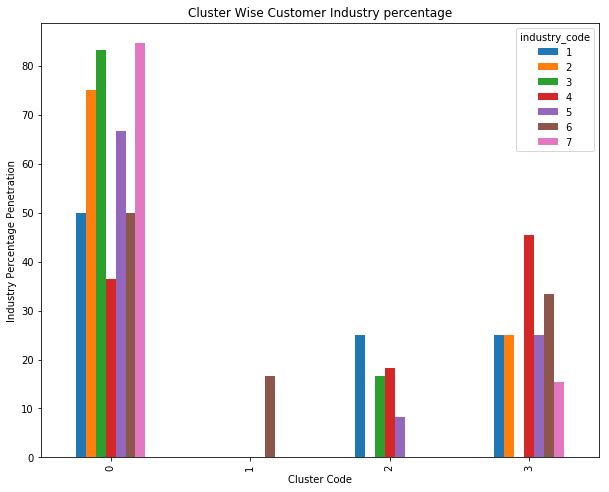

In [118]:
sale_temp_df.pivot(index='cluster_id',columns='industry_code',values='per_customer_count').fillna(0).reset_index().\
                    plot(kind='bar',x='cluster_id',y=[1,2,3,4,5,6,7],figsize=(10,8))
plt.title("Cluster Wise Customer Industry percentage")
plt.xlabel("Cluster Code")
plt.ylabel("Industry Percentage Penetration")
plt.show()

<b>Analysis</b>

More than 35% of customers from each industry overall is part of CLuster 0

Almost 40% of customers in industry 4 is part of cluster 3


<h2>Sales and Profit per each cluster</h2>

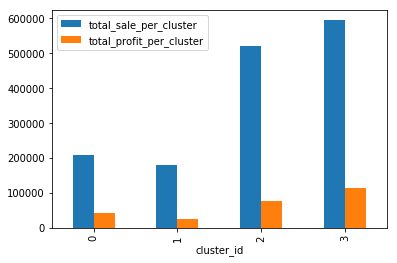

In [120]:
sale_data_df.groupby(['cluster_id']).agg(total_sale_per_cluster=('gross_sales','sum'),
                                        total_profit_per_cluster=('gross_profit','sum')).plot(kind='bar')

In [121]:
sale_data_df.groupby(['cluster_id']).agg(total_sale_per_cluster=('gross_sales','sum'),
                                        total_profit_per_cluster=('gross_profit','sum'))

,total_sale_per_cluster,total_profit_per_cluster
cluster_id,,
0,207004,41064.465
1,179101,25074.140
2,521040,75873.580
3,593845,112337.690


<b>Summary</b>

For Cluster 0 : Total Sale --> 207K and Profit 41k 

For Cluster 1 : Total Sale --> 179K and Profit 25K

For Cluster 2 : Total Sale --> 521K and Profit 758k

For Cluster 3 : Total Sale --> 593K and Profit 112K